### 1️) import pandas as pd

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### 2) Load & Inspect Data

In [21]:
df = pd.read_csv("retail_sales_forecasting_dataset.csv")
print(df.head())
print(df.info())

         date    store    item  sales
0  01-01-2022  Store_1  Item_1      5
1  02-01-2022  Store_2  Item_2     20
2  03-01-2022  Store_3  Item_3     35
3  04-01-2022  Store_1  Item_4     50
4  05-01-2022  Store_2  Item_5     65
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    100 non-null    object
 1   store   100 non-null    object
 2   item    100 non-null    object
 3   sales   100 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 3.3+ KB
None


### 3) Exploratory Data Analysis (EDA)

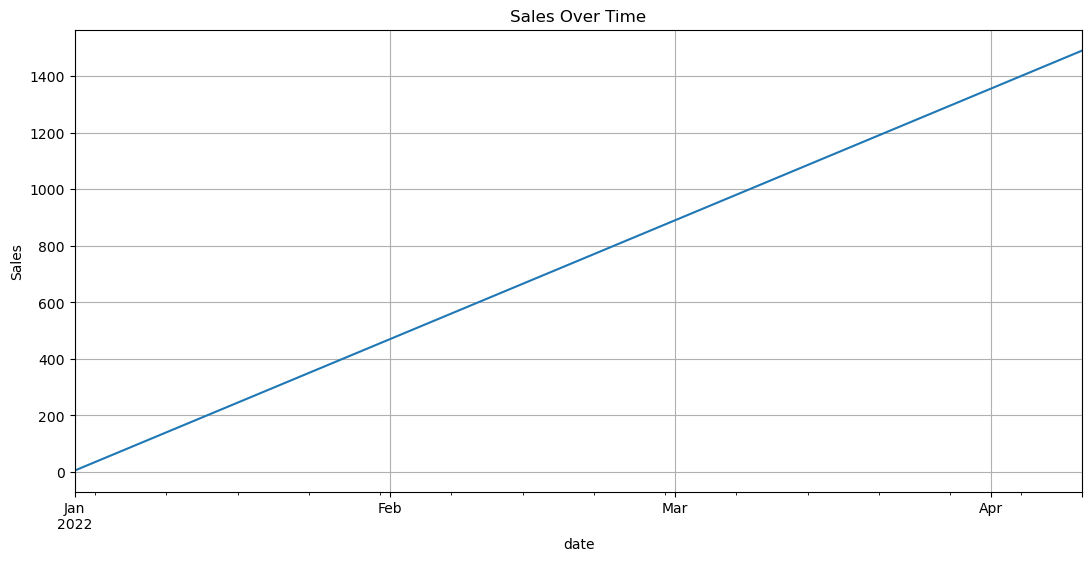

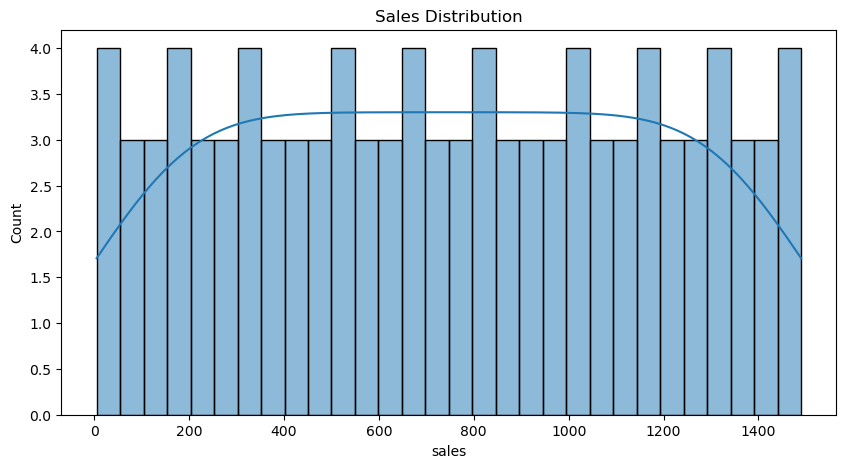

In [22]:
# Convert date column
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)

# Basic time-series plot
plt.figure(figsize=(13, 6))
df['sales'].plot()
plt.title("Sales Over Time")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

# Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['sales'], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

### 4) Preprocessing

In [23]:
# Handle categorical variables
le_store = LabelEncoder()
le_item = LabelEncoder()

df['store'] = le_store.fit_transform(df['store'])
df['item'] = le_item.fit_transform(df['item'])

# Fill NA (if any)
df.fillna(method='ffill', inplace=True)

C:\Users\thota\AppData\Local\Temp\ipykernel_26896\3782352247.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


### 5) Forecasting

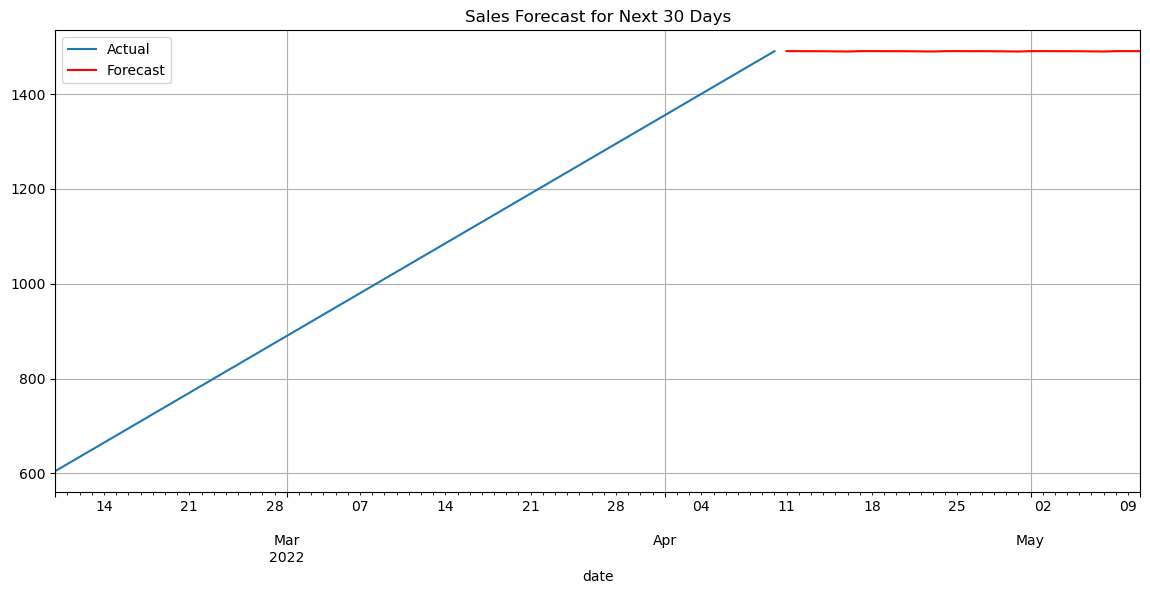

In [24]:
# Aggregate sales by date
df_daily = df.resample('D').sum()

# Fit Holt-Winters model
model = ExponentialSmoothing(df_daily['sales'], seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Forecast next 30 days
forecast = model_fit.forecast(30)
forecast_df = pd.DataFrame({'forecasted_sales': forecast})
forecast_df.index.name = 'date'

# Plot actual vs forecast
plt.figure(figsize=(14, 6))
df_daily['sales'][-60:].plot(label='Actual')
forecast.plot(label='Forecast', color='red')
plt.title("Sales Forecast for Next 30 Days")
plt.legend()
plt.grid(True)
plt.show()

### 6) Save for Power BI

In [25]:
# Combine original + forecast
future_df = forecast_df.copy()
future_df['store'] = "Forecast"
future_df['item'] = "All"
future_df.reset_index(inplace=True)

# Final export-ready data
export_df = pd.concat([
    df.reset_index()[['date', 'store', 'item', 'sales']],
    future_df.rename(columns={'forecasted_sales': 'sales'})
])

export_df.to_csv("sales_forecast_for_powerbi.csv", index=False)
print("✅ Data exported successfully to sales_forecast_for_powerbi.csv")

✅ Data exported successfully to sales_forecast_for_powerbi.csv
